# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | siklos
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | kefamenanu
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | barguzin
Processing Record 14 of Set 1 | longjiang
Processing Record 15 of Set 1 | sanguesa/zangoza
City not found. Skipping...
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | uzgen
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of S

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,siklos,45.8550,18.2975,14.58,100,19,2.06,HU,1730070675
1,blackmans bay,-43.0167,147.3167,11.52,60,13,1.79,AU,1730070676
2,iqaluit,63.7506,-68.5145,-7.39,85,76,5.36,CA,1730070677
3,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730070679
4,ketchikan,55.3422,-131.6461,8.99,87,75,3.09,US,1730070680


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siklos,45.8550,18.2975,14.58,100,19,2.06,HU,1730070675
1,blackmans bay,-43.0167,147.3167,11.52,60,13,1.79,AU,1730070676
2,iqaluit,63.7506,-68.5145,-7.39,85,76,5.36,CA,1730070677
3,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730070679
4,ketchikan,55.3422,-131.6461,8.99,87,75,3.09,US,1730070680


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

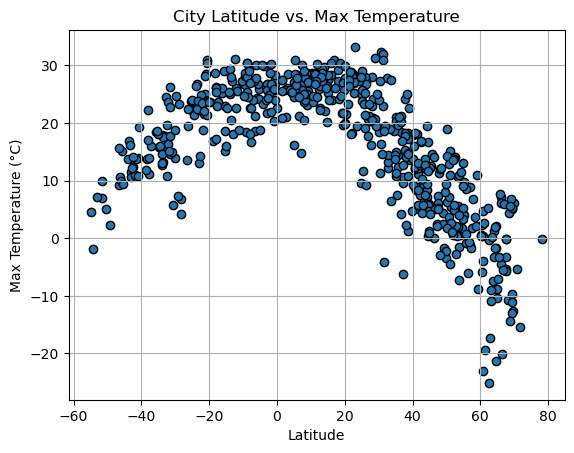

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

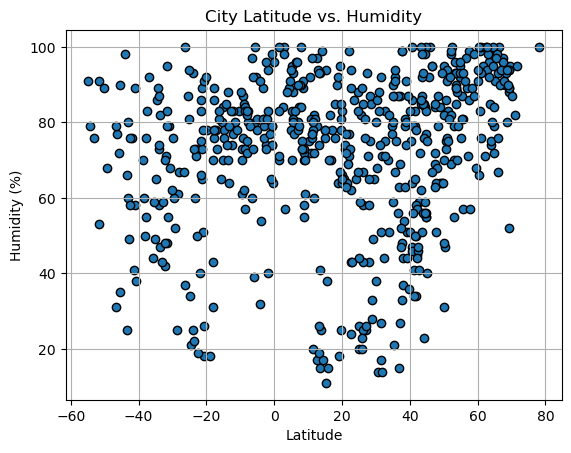

In [25]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

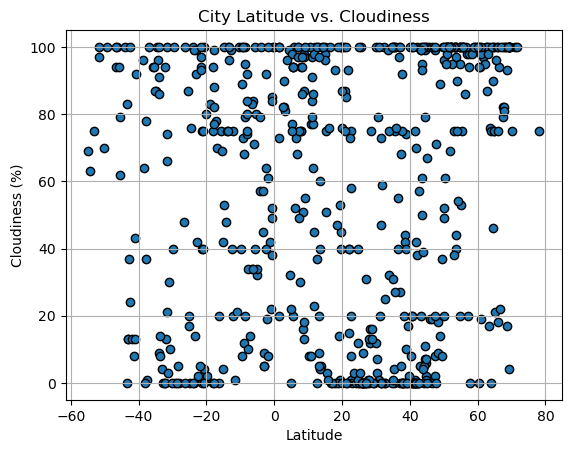

In [28]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

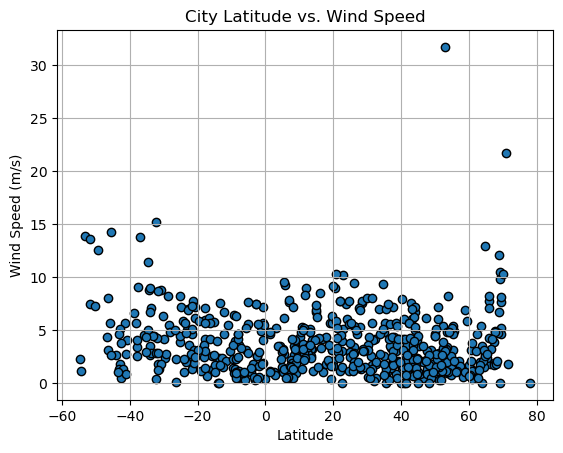

In [31]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = slope * x_values + intercept
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", label="Data")
    plt.plot(x_values, regress_values, "r-", label=f"Fit Line (R² = {r_value**2:.2f})")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Show plot
    plt.show()
    
    # Return regression values
    return slope, intercept, r_value, p_value, std_err

In [36]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siklos,45.8550,18.2975,14.58,100,19,2.06,HU,1730070675
2,iqaluit,63.7506,-68.5145,-7.39,85,76,5.36,CA,1730070677
3,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730070679
4,ketchikan,55.3422,-131.6461,8.99,87,75,3.09,US,1730070680
9,isafjordur,66.0755,-23.1240,-4.56,67,18,4.22,IS,1730070440


In [38]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,siklos,45.8550,18.2975,14.58,100,19,2.06,HU,1730070675
2,iqaluit,63.7506,-68.5145,-7.39,85,76,5.36,CA,1730070677
3,yellowknife,62.4560,-114.3525,-0.33,100,100,4.63,CA,1730070679
4,ketchikan,55.3422,-131.6461,8.99,87,75,3.09,US,1730070680
9,isafjordur,66.0755,-23.1240,-4.56,67,18,4.22,IS,1730070440


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,11.52,60,13,1.79,AU,1730070676
5,coquimbo,-29.9533,-71.3436,13.88,76,40,4.12,CL,1730070464
6,kefamenanu,-9.4467,124.4781,26.65,61,8,1.40,ID,1730070682
7,port-aux-francais,-49.3500,70.2167,2.33,68,100,12.55,TF,1730070683
8,grytviken,-54.2811,-36.5092,-1.89,79,63,1.14,GS,1730070684


###  Temperature vs. Latitude Linear Regression Plot

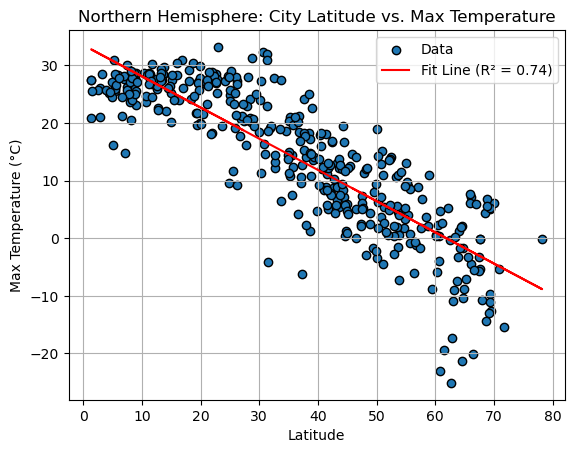

Slope: -0.5411116255849676, Intercept: 33.47972466004893, R-squared: 0.74


In [44]:
# Linear regression on Northern Hemisphere
# Define the x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Apply the linear regression function
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Max Temperature (°C)",
    "Northern Hemisphere: City Latitude vs. Max Temperature"
)

# Print the linear regression results
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2:.2f}")

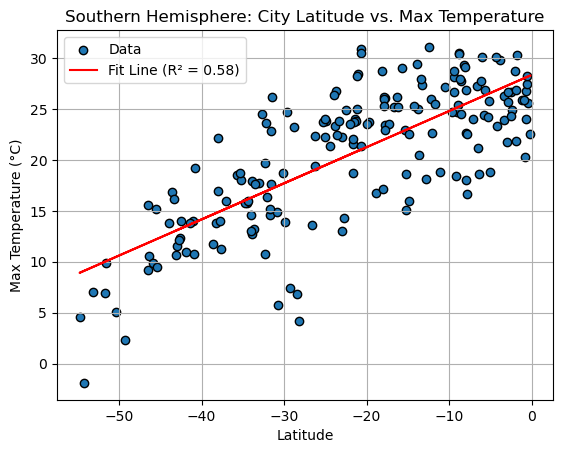

Slope: 0.35428558820870015, Intercept: 28.329052381755186, R-squared: 0.58


In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Apply the linear regression function
slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Max Temperature (°C)",
    "Southern Hemisphere: City Latitude vs. Max Temperature"
)

# Print the linear regression results
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2:.2f}")


**Discussion about the linear relationship:** A negative relationship exists between Temperature and Latitude in the Northern Hemisphere. The R^2 indicates that the relation is strongly so.

There is a positive relationship between Temperature and Latitude in the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

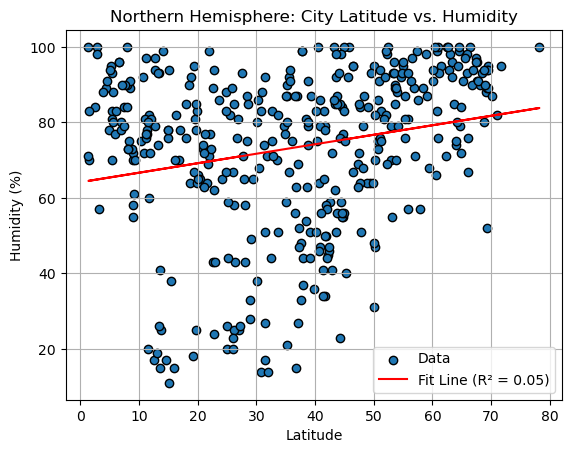

Slope: 0.251225933122022, Intercept: 64.17386956764584, R-squared: 0.05


In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Humidity (%)",
    "Northern Hemisphere: City Latitude vs. Humidity"
)

print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2:.2f}")


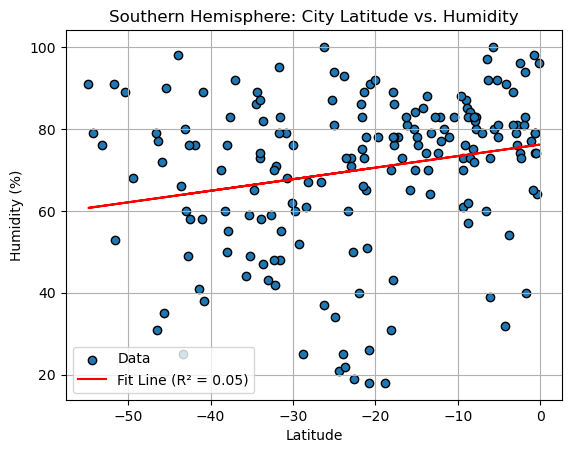

Slope: 0.251225933122022, Intercept: 76.18756518090369, R-squared: 0.05


In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

lope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Humidity (%)",
    "Southern Hemisphere: City Latitude vs. Humidity"
)

print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2:.2f}")

**Discussion about the linear relationship:** The relationship between Humidity and Latitude can not really be established in both Hemispheres and this can be seen from the R^2 which is lower than 0.5.

### Cloudiness vs. Latitude Linear Regression Plot

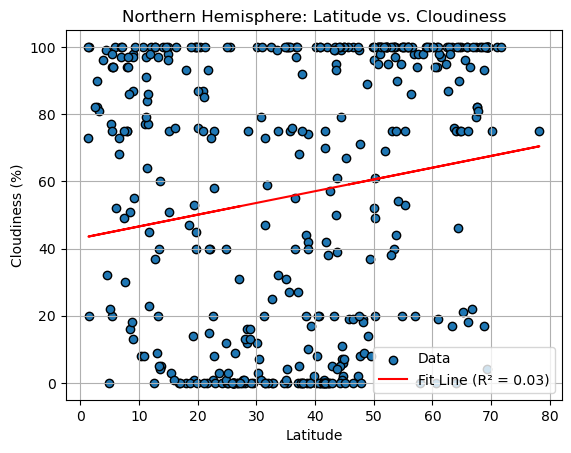

Slope: 0.3495895810896074, Intercept: 43.0837159669308, R-squared: 0.03


In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Cloudiness (%)",
    "Northern Hemisphere: Latitude vs. Cloudiness"
)

print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2:.2f}")

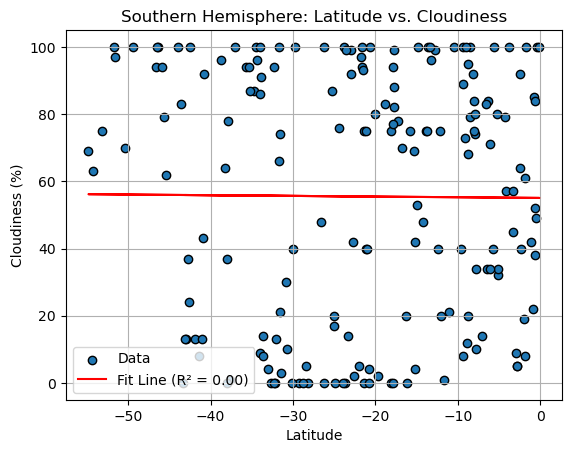

Slope: -0.020209365652564527, Intercept: 55.05743309122014, R-squared: 0.00


In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Cloudiness (%)",
    "Southern Hemisphere: Latitude vs. Cloudiness"
)

print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2:.2f}")

**Discussion about the linear relationship:** There is no relationship between Latitude and cloudiness. This can be seen in how the data is spread and the low R2. This is the case in both the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

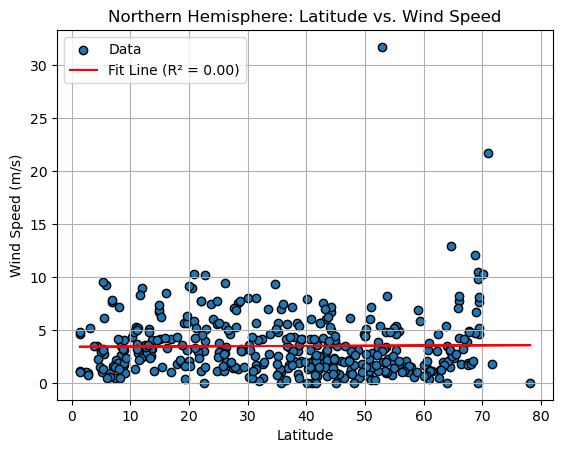

The r^2-value is: 0.00


In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Wind Speed (m/s)",
    "Northern Hemisphere: Latitude vs. Wind Speed"
)

print(f"The r^2-value is: {r_value**2:.2f}")

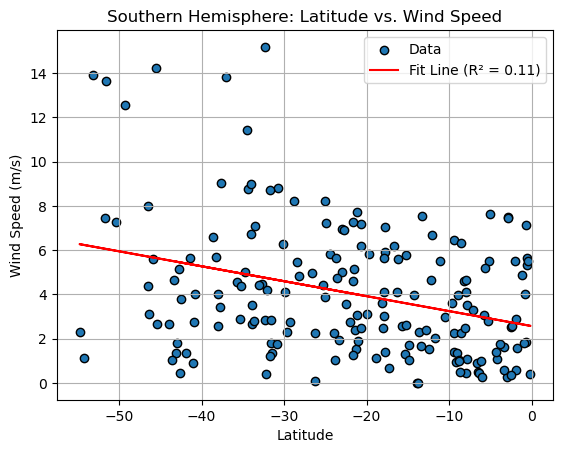

The r^2-value is: 0.11


In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

slope, intercept, r_value, p_value, std_err = plot_linear_regression(
    x_values, y_values,
    "Latitude", "Wind Speed (m/s)",
    "Southern Hemisphere: Latitude vs. Wind Speed"
)

print(f"The r^2-value is: {r_value**2:.2f}")

**Discussion about the linear relationship:** here is no relationship between Latitude and Wind Speed. This can be seen in how the data is spread and the low R2. This is the case in both the Northern and Southern Hemispheres.